# UNDERSTANDING DIMENTIONALITY REDUCTION USING MNIST DATASET

In this notebook we will explore the different techniques of Dimentionality Reduction. We will build Principal Component Analysis (PCA) from scratch and then use scikit-learn to build the same. We will also explore Linear Discriminant Analysis (LDA) and T-Distributed Stochastic Neighbour Embedding (t-SNE) using scikit-learn.  

## 1.PRINCIPAL COMPONENT ANALYSIS (PCA)

PCA is fundamentally a simple dimensionality reduction technique that transforms the columns of a dataset into a new set features. It does this by finding a new set of directions (like X and Y axes) that explain the maximum variability in the data.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# !kaggle competitions download -c digit-recognizer

In [3]:
# !unzip digit-recognizer.zip

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Prepare X and Y
Y = df['label']
X = df.drop("label",axis=1)

In [7]:
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PCA FROM SCRATCH
**STANDARDIZE EACH COLUMN**

In [9]:
X_standard = X - X.mean()
X_standard

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.219286,-0.117095,-0.059024,-0.02019,-0.017238,-0.002857,0.0,0.0,0.0,0.0


**COMPUTE COVARIANCE MATRIX**

In [10]:
df_cov = X_standard.cov()
print(df.shape)
df_cov.head()

(42000, 785)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
pixel0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**COMPUTE EIGEN VECTORS AND EIGEN VALUES**

In [11]:
from numpy.linalg import eig
eigvalues, eigvectors = eig(df_cov)
print(eigvalues[:10])
print(eigvectors.shape)

[334780.59149447 245885.06513832 211051.62698822 184726.37342816
 168070.0015068  147773.28274113 112534.61945611  99315.43743442
  95016.01443299  80660.73018992]
(784, 784)


**DERIVE PRINCIPAL COMPONENT FEATURES BY TAKING DOT PRODUCT VECTOR AND STANDARDIZED COLUMNS**

In [12]:
X_pca = np.dot(X_standard, eigvectors)
df_pca_calc = pd.DataFrame(X_pca) 
df_pca_calc.round(2).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-661.60,-699.31,-183.28,-120.61,-81.08,-489.46,-683.47,85.56,-348.55,202.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1701.45,-360.55,501.81,-335.42,-442.38,-738.40,653.88,-176.60,7.52,67.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-886.89,-293.77,-67.16,-78.26,-473.72,323.54,437.80,-305.38,195.30,-25.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-165.76,300.18,64.15,-759.71,-425.84,-157.39,-304.10,276.41,45.87,-295.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1923.71,-449.15,548.61,-188.56,-651.74,-990.06,564.51,-255.92,-124.91,177.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA USING SCIKIT-LEARN

In [13]:
from sklearn.decomposition import PCA

In [14]:
n_components = 30
pca = PCA(n_components=n_components).fit(X)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
eigenvalues = pca.components_

X30 = pca.transform(X_standard)

**VIZ EIGEN VALUES**

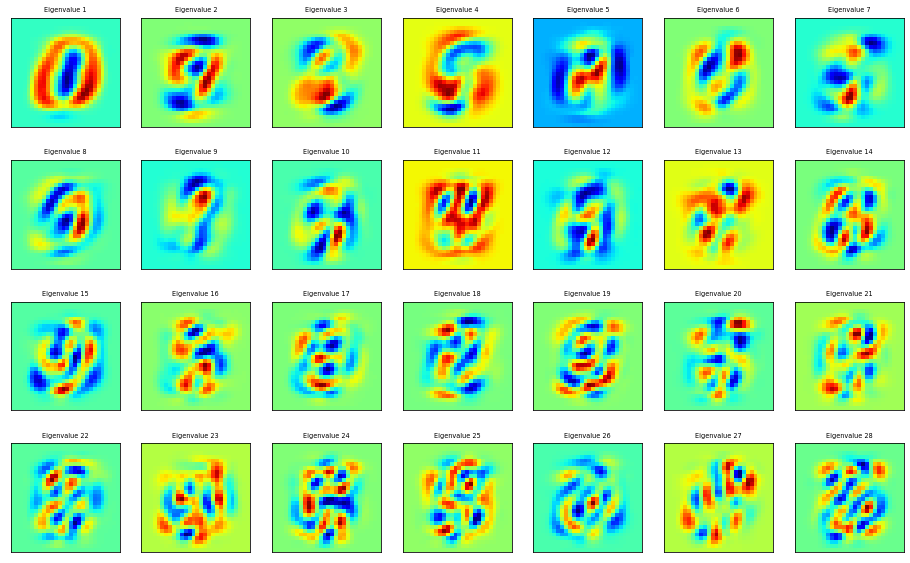

In [15]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(16,10))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

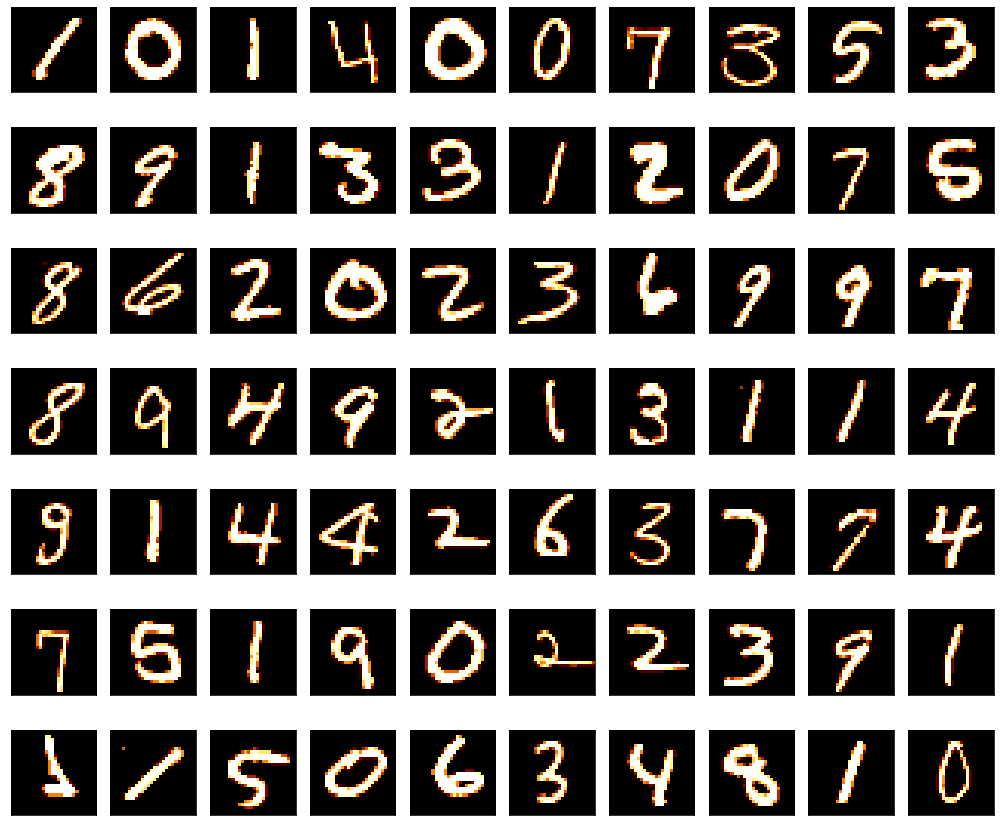

In [16]:
# plot some of the numbers
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = X.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

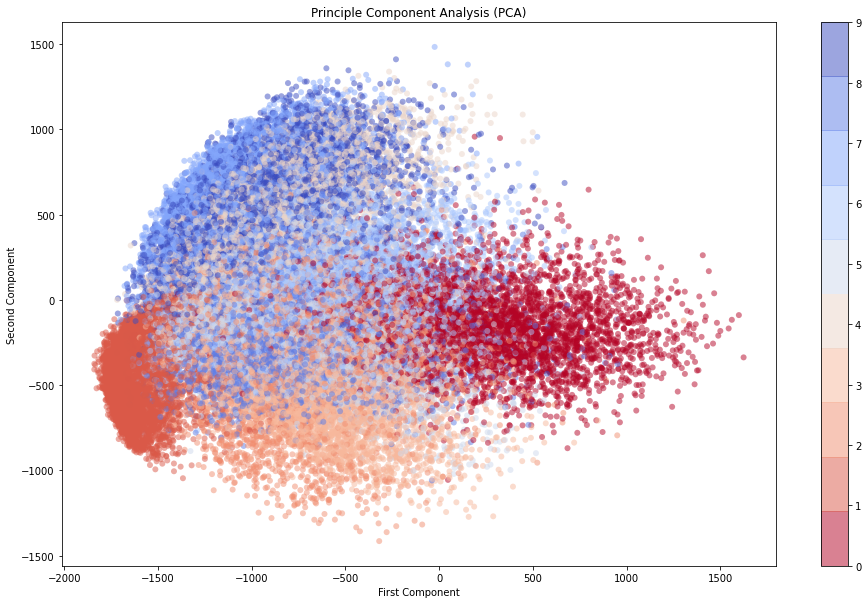

In [17]:
plt.figure(figsize=(16,10))
plt.scatter(X30[:, 0], X30[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('coolwarm_r', 10))
plt.title('Principle Component Analysis (PCA)')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.colorbar();

## 2.LINEAR DISCRIMINANT ANALYSIS (LDA)

LDA is very much similar to PCA. The main difference is PCA is unsupervised and LDA is supervised. LDA will seek to maximise the separation between the different classes by computing the component axes (linear discriminants ) which does this.

In [18]:
#Standardize the columns
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, Y)

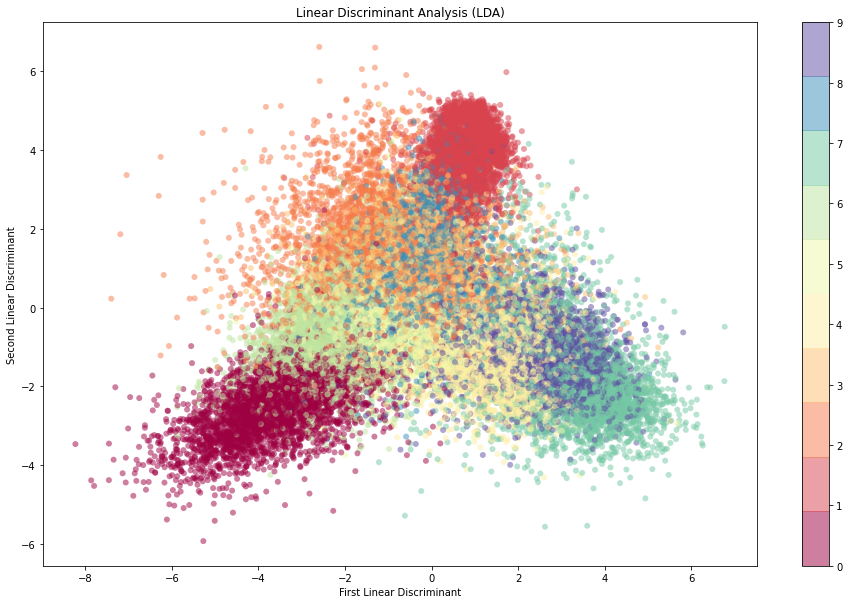

In [20]:
plt.figure(figsize=(16,10))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.colorbar();

## 3. T-Distributed Stochastic Neighbour Embedding (t-SNE) 

In [21]:
from sklearn.manifold import TSNE

In [22]:
#Run tsne on reduced dimension by pca
%%time
tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X30)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 42000 samples in 0.139s...
[t-SNE] Computed neighbors for 42000 samples in 146.786s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities for s

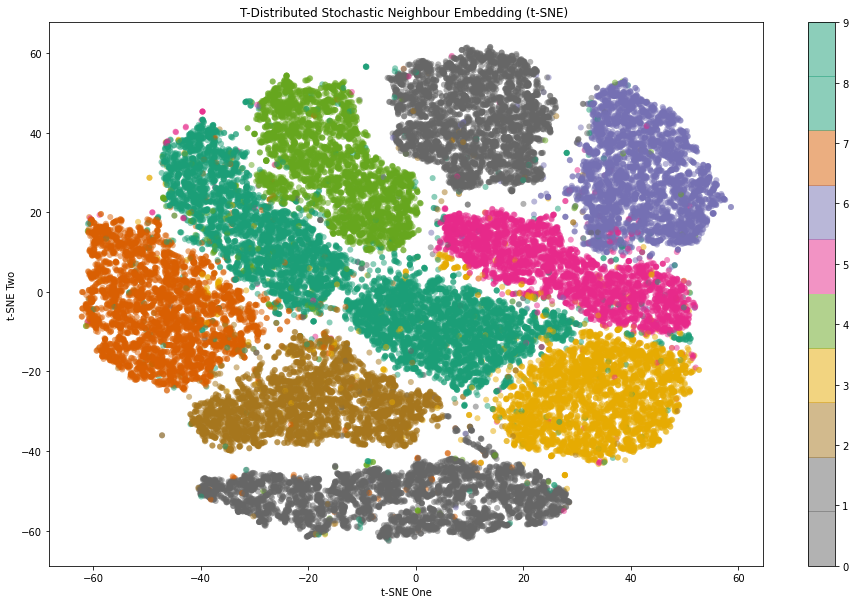

In [34]:
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2_r', 10))
plt.title('T-Distributed Stochastic Neighbour Embedding (t-SNE) ')
plt.xlabel('t-SNE One')
plt.ylabel('t-SNE Two')
plt.colorbar();

In [37]:
tsne_results.shape

(42000, 2)